#**Name-Aritra Ray**


#**Roll No.-21IM10008**

11490434/11490434 [==============================] - 0s 0us/step
Classification report for SVC with linear kernel:
              precision    recall  f1-score   support

           0       0.91      0.96      0.94       175
           1       0.96      0.99      0.98       234
           2       0.89      0.89      0.89       219
           3       0.84      0.88      0.86       207
           4       0.90      0.94      0.92       217
           5       0.89      0.84      0.87       179
           6       0.90      0.93      0.91       178
           7       0.89      0.86      0.88       205
           8       0.89      0.83      0.86       192
           9       0.89      0.84      0.86       194

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000

Classification report for SVC with poly kernel:
              precision    recall  f1-score   support

           0       0.95

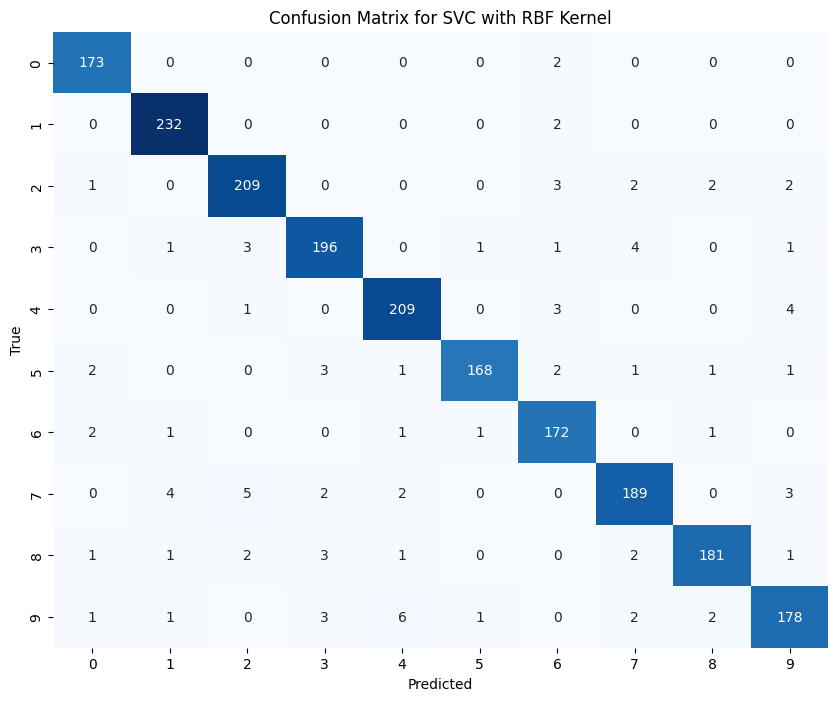

In [ ]:
# Import necessary libraries
from keras.datasets import mnist
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Flatten each input image
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Normalize pixel values
X_train_normalized = X_train_flat / 255.0
X_test_normalized = X_test_flat / 255.0

# Select subset of samples for training and testing
X_train_subset = X_train_normalized[:10000]
y_train_subset = y_train[:10000]
X_test_subset = X_test_normalized[:2000]
y_test_subset = y_test[:2000]


kernels = ['linear', 'poly', 'rbf']
for kernel in kernels:
    # Train SVC model
    svc_model = SVC(kernel=kernel)
    svc_model.fit(X_train_subset, y_train_subset)

    # Evaluate model performance
    y_pred = svc_model.predict(X_test_subset)

    # Generate classification report
    report = classification_report(y_test_subset, y_pred)
    print(f"Classification report for SVC with {kernel} kernel:\n{report}")


# Define parameter grid for GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001]}

# Perform GridSearchCV
grid_search = GridSearchCV(SVC(kernel='rbf'), param_grid, cv=5)
grid_search.fit(X_train_subset, y_train_subset)

# Get best hyperparameters from GridSearchCV
best_params_grid = grid_search.best_params_
print("Best hyperparameters from GridSearchCV:", best_params_grid)

# Perform RandomizedSearchCV
random_search = RandomizedSearchCV(SVC(kernel='rbf'), param_grid, cv=5, n_iter=10, random_state=42)
random_search.fit(X_train_subset, y_train_subset)

# Get best hyperparameters from RandomizedSearchCV
best_params_random = random_search.best_params_
print("Best hyperparameters from RandomizedSearchCV:", best_params_random)


# Train SVC model with best hyperparameters from GridSearchCV
best_svc_model = SVC(kernel='rbf', C=best_params_grid['C'], gamma=best_params_grid['gamma'])
best_svc_model.fit(X_train_subset, y_train_subset)

# Evaluate model performance
y_pred_best = best_svc_model.predict(X_test_subset)

# Generate classification report
report_best = classification_report(y_test_subset, y_pred_best)
print("Classification report for SVC with best hyperparameters from GridSearchCV:\n", report_best)


# Plot confusion matrix
plt.figure(figsize=(10, 8))
cm = confusion_matrix(y_test_subset, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVC with RBF Kernel')
plt.show()

Mean Squared Error (Default Parameters): 1.3922086000291185


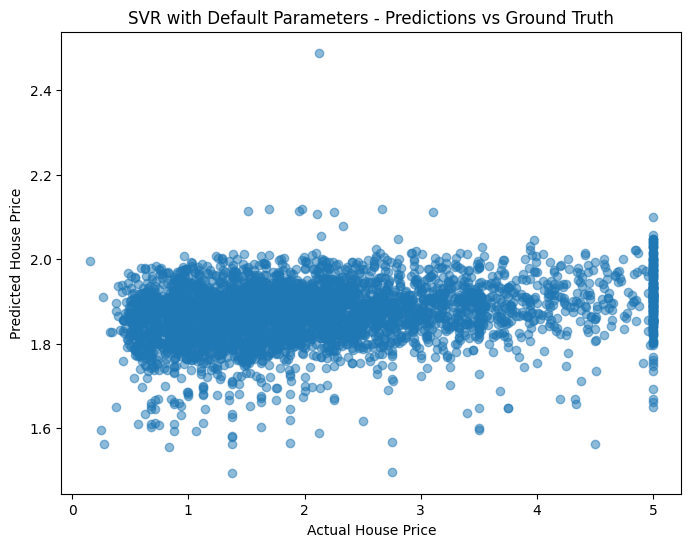

Best Epsilon Parameter: 1.0
Mean Squared Error (Best Hyperparameter): 1.3558710340977345


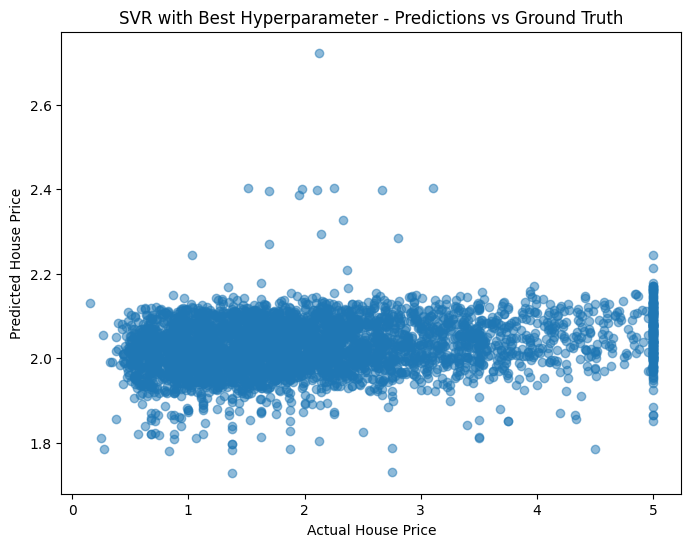

In [1]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Data Preparation
# Import California Housing dataset
california_housing = fetch_california_housing()

# Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(california_housing.data,
                                                    california_housing.target,
                                                    test_size=0.2,
                                                    random_state=30)

# Step 2: Model Training with Default Parameters
# Train SVR model with default parameters
svr_default = SVR(epsilon=0.5)
svr_default.fit(X_train, y_train)

# Make predictions on the testing set
y_pred_default = svr_default.predict(X_test)

# Calculate mean squared error (MSE)
mse_default = mean_squared_error(y_test, y_pred_default)
print("Mean Squared Error (Default Parameters):", mse_default)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_default, alpha=0.5)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("SVR with Default Parameters - Predictions vs Ground Truth")
plt.show()

# Step 3: Hyperparameter Tuning using GridSearchCV
# Define range of epsilon values
epsilon_values = np.arange(0, 2.6, 0.1)

# Set up parameter grid for GridSearchCV
param_grid = {'epsilon': epsilon_values}

# Perform 10-fold cross-validated grid search
grid_search = GridSearchCV(SVR(), param_grid, cv=10)
grid_search.fit(X_train, y_train)

# Print best epsilon parameter obtained from GridSearchCV
best_epsilon = grid_search.best_params_['epsilon']
print("Best Epsilon Parameter:", best_epsilon)

# Step 4: Model Training with Best Hyperparameter
# Train SVR model with best epsilon parameter
svr_best = SVR(epsilon=best_epsilon)
svr_best.fit(X_train, y_train)

# Predict the target variable for the testing set
y_pred_best = svr_best.predict(X_test)

# Calculate mean squared error (MSE)
mse_best = mean_squared_error(y_test, y_pred_best)
print("Mean Squared Error (Best Hyperparameter):", mse_best)

# Scatter plot visualization
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_best, alpha=0.5)
plt.xlabel("Actual House Price")
plt.ylabel("Predicted House Price")
plt.title("SVR with Best Hyperparameter - Predictions vs Ground Truth")
plt.show()
